# Specialty Data Analysis: Facility Comparison with Master Data

This notebook analyzes the specialty data files (S1-S16) and compares the facilities in these files with the master data to identify which facilities are present or missing.

## Objective
- Load and examine all specialty data files (S1.xlsx to S16.xlsx)
- Load and examine master data files
- Compare facilities between specialty data and master data
- Generate a comprehensive report of missing facilities

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.0
Numpy version: 2.3.0


In [2]:
# Set up paths
base_path = "/Users/ankitraj2/asar master data"
specialty_data_path = os.path.join(base_path, "specialty data")

print(f"Base path: {base_path}")
print(f"Specialty data path: {specialty_data_path}")

# Check if paths exist
print(f"Base path exists: {os.path.exists(base_path)}")
print(f"Specialty data path exists: {os.path.exists(specialty_data_path)}")

# List all files in specialty data folder
if os.path.exists(specialty_data_path):
    specialty_files = [f for f in os.listdir(specialty_data_path) if f.endswith('.xlsx')]
    specialty_files.sort()
    print(f"\nFound {len(specialty_files)} specialty files:")
    for i, file in enumerate(specialty_files, 1):
        print(f"{i:2d}. {file}")
else:
    print("Specialty data folder not found!")

Base path: /Users/ankitraj2/asar master data
Specialty data path: /Users/ankitraj2/asar master data/specialty data
Base path exists: True
Specialty data path exists: True

Found 16 specialty files:
 1. S1.xlsx
 2. S10.xlsx
 3. S11.xlsx
 4. S12.xlsx
 5. S13.xlsx
 6. S14.xlsx
 7. S15.xlsx
 8. S16.xlsx
 9. S2.xlsx
10. S3.xlsx
11. S4.xlsx
12. S5.xlsx
13. S6.xlsx
14. S7.xlsx
15. S8.xlsx
16. S9.xlsx


In [3]:
# Function to safely read files (they appear to be CSV files with .xlsx extension)
def read_specialty_file(file_path):
    """
    Try to read a file as CSV first, then as Excel if CSV fails
    """
    try:
        # First try as CSV since we discovered these are actually CSV files
        df = pd.read_csv(file_path)
        return df, "CSV"
    except:
        try:
            # If CSV fails, try Excel
            df = pd.read_excel(file_path, engine='openpyxl')
            return df, "Excel"
        except:
            try:
                # Try with xlrd engine for older Excel files
                df = pd.read_excel(file_path, engine='xlrd')
                return df, "Excel (xlrd)"
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                return None, "Error"

# Test reading one file first
if specialty_files:
    test_file = os.path.join(specialty_data_path, specialty_files[0])
    test_df, file_type = read_specialty_file(test_file)
    if test_df is not None:
        print(f"Successfully read {specialty_files[0]} as {file_type}")
        print(f"Shape: {test_df.shape}")
        print(f"Columns: {list(test_df.columns)}")
        print("\nFirst 3 rows:")
        print(test_df.head(3))
    else:
        print(f"Failed to read {specialty_files[0]}")

Successfully read S1.xlsx as CSV
Shape: (7981, 78)
Columns: ['Sr No', 'Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'API Latitude', 'API Longitude', 'Hospital Address', 'Hospital E-Mail', 'Hospital Contact', 'Specialities Empanelled', 'Specialities Upgraded', 'Types of Employees', 'M1_emp', 'M10_emp', 'M2_emp', 'M3_emp', 'M4_emp', 'M5_emp', 'M6_emp', 'M7_emp', 'M8_emp', 'S1_emp', 'S10_emp', 'S11_emp', 'S12_emp', 'S13_emp', 'S14_emp', 'S15_emp', 'S16_emp', 'S2_emp', 'S3_emp', 'S4_emp', 'S5_emp', 'S6_emp', 'S7_emp', 'M1_upg', 'M10_upg', 'M2_upg', 'M3_upg', 'M4_upg', 'M5_upg', 'M6_upg', 'M7_upg', 'M8_upg', 'S1_upg', 'S10_upg', 'S11_upg', 'S12_upg', 'S13_upg', 'S14_upg', 'S15_upg', 'S16_upg', 'S2_upg', 'S3_upg', 'S4_upg', 'S5_upg', 'S6_upg', 'S7_upg', 'Manual District', 'Manual state', 'gmaps_Latitude', 'gmaps_Longitude', 'gmaps_Accuracy', 'Specialities_Upgraded_or_Empanelled', 'Test extract', 'is_RU', 'pincode_py', 'address_py', 'Auto Score', 'Road',

In [4]:
# Load all specialty data files
specialty_data = {}
file_info = []

print("Loading all specialty data files...")
print("=" * 50)

for file in specialty_files:
    file_path = os.path.join(specialty_data_path, file)
    df, file_type = read_specialty_file(file_path)
    
    if df is not None:
        specialty_data[file] = df
        file_info.append({
            'filename': file,
            'file_type': file_type,
            'rows': df.shape[0],
            'columns': df.shape[1],
            'column_names': list(df.columns)
        })
        print(f"✓ {file:10s} | Type: {file_type:12s} | Shape: {df.shape}")
    else:
        print(f"✗ {file:10s} | Failed to read")
        file_info.append({
            'filename': file,
            'file_type': 'Error',
            'rows': 0,
            'columns': 0,
            'column_names': []
        })

print(f"\nSuccessfully loaded {len(specialty_data)} out of {len(specialty_files)} files")

# Create a summary DataFrame
file_summary_df = pd.DataFrame(file_info)
print("\nFile Summary:")
print(file_summary_df)

Loading all specialty data files...
✓ S1.xlsx    | Type: CSV          | Shape: (7981, 78)
✓ S10.xlsx   | Type: CSV          | Shape: (3324, 78)
✓ S11.xlsx   | Type: CSV          | Shape: (3324, 78)
✓ S12.xlsx   | Type: CSV          | Shape: (3129, 78)
✓ S13.xlsx   | Type: CSV          | Shape: (2436, 78)
✓ S14.xlsx   | Type: CSV          | Shape: (3078, 78)
✓ S15.xlsx   | Type: CSV          | Shape: (2717, 78)
✓ S16.xlsx   | Type: CSV          | Shape: (3949, 78)
✓ S2.xlsx    | Type: CSV          | Shape: (4681, 78)
✓ S3.xlsx    | Type: CSV          | Shape: (4790, 78)
✓ S4.xlsx    | Type: CSV          | Shape: (7900, 78)
✓ S5.xlsx    | Type: CSV          | Shape: (6287, 78)
✓ S6.xlsx    | Type: CSV          | Shape: (3576, 78)
✓ S7.xlsx    | Type: CSV          | Shape: (4598, 78)
✓ S8.xlsx    | Type: CSV          | Shape: (3606, 78)
✓ S9.xlsx    | Type: CSV          | Shape: (3292, 78)

Successfully loaded 16 out of 16 files

File Summary:
    filename file_type  rows  columns  \
0   

## Load Master Data Files

Now let's examine the master data files to understand their structure and identify facility columns for comparison.

In [5]:
# Find and examine master data files
master_files = []
for file in os.listdir(base_path):
    if file.endswith('.csv') and ('master' in file.lower() or 'final' in file.lower() or 'merged' in file.lower()):
        master_files.append(file)

print("Found potential master data files:")
for i, file in enumerate(master_files, 1):
    print(f"{i}. {file}")

# Let's also look for any CSV files that might contain facility data
all_csv_files = [f for f in os.listdir(base_path) if f.endswith('.csv')]
print(f"\nAll CSV files in base directory ({len(all_csv_files)} files):")
for i, file in enumerate(all_csv_files, 1):
    file_path = os.path.join(base_path, file)
    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
    print(f"{i:2d}. {file:<50} ({file_size:.1f} MB)")

# Load and examine the most likely master files
master_data = {}
print("\n" + "="*70)
print("EXAMINING MASTER DATA FILES")
print("="*70)

# Priority order for master files
priority_files = ['final_master.csv', 'NHA_Master_deduplicated_20250913_115643.csv', 'updated_master.csv']

for file in priority_files:
    if file in all_csv_files:
        try:
            file_path = os.path.join(base_path, file)
            print(f"\nLoading {file}...")
            df = pd.read_csv(file_path)
            master_data[file] = df
            print(f"✓ Shape: {df.shape}")
            print(f"✓ Columns: {list(df.columns)}")
            print(f"✓ First few rows:")
            print(df.head(2))
        except Exception as e:
            print(f"✗ Error loading {file}: {e}")

print(f"\nLoaded {len(master_data)} master data files")

Found potential master data files:
1. NHA_Master_merged_TEST.csv
2. final_master.csv
3. NHA_Master_deduplicated_20250913_115643.csv
4. updated_master.csv

All CSV files in base directory (14 files):
 1. 22_MAY_22_AP_NIN.csv                               (1.8 MB)
 2. 8_JULY_23_SRK_NHP_validated_and_standardized.csv   (0.3 MB)
 3. 1_MAR_AR_2025_NHA_WITH_PMJAY_SPECIALITIES_WITH_CODES.csv (102.2 MB)
 4. 21_JULY_23_SRK_PMGSY_validated_homogenized.csv     (5.6 MB)
 5. NHA_Master_merged_TEST.csv                         (92.8 MB)
 6. 21_June_2024_AM_PHC.csv                            (2.8 MB)
 7. final_master.csv                                   (91.0 MB)
 8. NHA_Master_deduplicated_20250913_115643.csv        (59.8 MB)
 9. 18_SEPTEMBER_23_SRK_CGHS_Correct_Data.csv          (0.9 MB)
10. CDAC_BB_DATASET - Sheet1.csv                       (1.1 MB)
11. 21_June_2024_AM_CHC.csv                            (0.4 MB)
12. updated_master.csv                                 (92.8 MB)
13. 16_MAY_AR_CDAC_BB

## Analyze Data Structures and Identify Facility Identifiers

Let's examine the column structures of both specialty and master data to identify common facility identifiers.

In [6]:
# Analyze column structures to identify facility identifiers
print("SPECIALTY DATA COLUMN ANALYSIS")
print("="*50)

# Get unique columns across all specialty files
all_specialty_columns = set()
for file, df in specialty_data.items():
    all_specialty_columns.update(df.columns)

print(f"Unique columns across all specialty files: {len(all_specialty_columns)}")
print("Columns:", sorted(list(all_specialty_columns)))

# Look for common facility identifier patterns
facility_id_patterns = [
    'facility_id', 'facility_code', 'facility_name', 'hospital_id', 'hospital_code', 
    'hospital_name', 'institution_id', 'institution_code', 'institution_name',
    'facility', 'hospital', 'institution', 'id', 'code', 'name'
]

potential_facility_cols = []
for col in all_specialty_columns:
    col_lower = col.lower()
    for pattern in facility_id_patterns:
        if pattern in col_lower:
            potential_facility_cols.append(col)
            break

print(f"\nPotential facility identifier columns in specialty data:")
for col in sorted(set(potential_facility_cols)):
    print(f"  - {col}")

print("\n" + "="*50)
print("MASTER DATA COLUMN ANALYSIS")
print("="*50)

for file, df in master_data.items():
    print(f"\n{file}:")
    print(f"  Columns ({len(df.columns)}): {list(df.columns)}")
    
    # Look for potential facility identifiers in master data
    master_facility_cols = []
    for col in df.columns:
        col_lower = col.lower()
        for pattern in facility_id_patterns:
            if pattern in col_lower:
                master_facility_cols.append(col)
                break
    
    print(f"  Potential facility columns: {sorted(set(master_facility_cols))}")

# Show sample data from first few specialty files for pattern recognition
print("\n" + "="*70)
print("SAMPLE DATA FROM SPECIALTY FILES")
print("="*70)

for i, (file, df) in enumerate(list(specialty_data.items())[:3]):
    print(f"\n{file}:")
    print(df.head(3))

SPECIALTY DATA COLUMN ANALYSIS
Unique columns across all specialty files: 78
Columns: ['API Latitude', 'API Longitude', 'Auto Score', 'City', 'Country', 'District', 'Formatted Address', 'Hospital Address', 'Hospital Contact', 'Hospital E-Mail', 'Hospital Name', 'Hospital Type', 'Locality', 'M10_emp', 'M10_upg', 'M1_emp', 'M1_upg', 'M2_emp', 'M2_upg', 'M3_emp', 'M3_upg', 'M4_emp', 'M4_upg', 'M5_emp', 'M5_upg', 'M6_emp', 'M6_upg', 'M7_emp', 'M7_upg', 'M8_emp', 'M8_upg', 'Manual District', 'Manual Hospital Address', 'Manual Hospital Name', 'Manual state', 'Road', 'S10_emp', 'S10_upg', 'S11_emp', 'S11_upg', 'S12_emp', 'S12_upg', 'S13_emp', 'S13_upg', 'S14_emp', 'S14_upg', 'S15_emp', 'S15_upg', 'S16_emp', 'S16_upg', 'S1_emp', 'S1_upg', 'S2_emp', 'S2_upg', 'S3_emp', 'S3_upg', 'S4_emp', 'S4_upg', 'S5_emp', 'S5_upg', 'S6_emp', 'S6_upg', 'S7_emp', 'S7_upg', 'Specialities Empanelled', 'Specialities Upgraded', 'Specialities_Upgraded_or_Empanelled', 'Sr No', 'State', 'Test extract', 'Types of Empl

## Facility Comparison Analysis

Based on the data structure analysis, we'll now compare facilities between specialty and master data.

In [7]:
# Function to extract facility identifiers from a dataframe
def extract_facility_identifiers(df, possible_id_cols):
    """
    Extract unique facility identifiers from a dataframe
    """
    identifiers = set()
    
    for col in possible_id_cols:
        if col in df.columns:
            # Remove NaN values and convert to string
            unique_vals = df[col].dropna().astype(str).unique()
            identifiers.update(unique_vals)
            print(f"  Found {len(unique_vals)} unique values in column '{col}'")
    
    return identifiers

# Function to find best matching columns between datasets
def find_matching_columns(specialty_cols, master_cols):
    """
    Find the best matching columns between specialty and master data
    """
    matches = []
    for s_col in specialty_cols:
        for m_col in master_cols:
            # Simple matching based on common substrings
            s_lower = s_col.lower()
            m_lower = m_col.lower()
            
            # Direct match
            if s_lower == m_lower:
                matches.append((s_col, m_col, 'exact'))
            # Partial match
            elif any(word in s_lower and word in m_lower for word in ['facility', 'hospital', 'institution', 'name', 'code', 'id']):
                matches.append((s_col, m_col, 'partial'))
    
    return matches

# Collect all facility identifiers from specialty data
print("EXTRACTING FACILITY IDENTIFIERS FROM SPECIALTY DATA")
print("="*60)

all_specialty_facilities = set()
specialty_facility_details = {}

for file, df in specialty_data.items():
    print(f"\nProcessing {file}:")
    
    # Find columns that might contain facility identifiers
    facility_cols = [col for col in df.columns if any(
        pattern in col.lower() for pattern in ['facility', 'hospital', 'institution', 'name', 'code', 'id']
    )]
    
    print(f"  Potential facility columns: {facility_cols}")
    
    if facility_cols:
        file_facilities = extract_facility_identifiers(df, facility_cols)
        specialty_facility_details[file] = {
            'facilities': file_facilities,
            'count': len(file_facilities),
            'columns_used': facility_cols
        }
        all_specialty_facilities.update(file_facilities)
        print(f"  Total unique facilities in this file: {len(file_facilities)}")
    else:
        print(f"  No clear facility columns found")
        specialty_facility_details[file] = {
            'facilities': set(),
            'count': 0,
            'columns_used': []
        }

print(f"\nTotal unique facilities across all specialty files: {len(all_specialty_facilities)}")

# Remove common non-facility values
exclude_values = {'nan', 'null', 'none', '', ' ', 'na', 'n/a'}
all_specialty_facilities = {f for f in all_specialty_facilities if f.lower() not in exclude_values and len(f.strip()) > 0}

print(f"After cleaning: {len(all_specialty_facilities)} unique facilities")

EXTRACTING FACILITY IDENTIFIERS FROM SPECIALTY DATA

Processing S1.xlsx:
  Potential facility columns: ['Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'Hospital Address', 'Hospital E-Mail', 'Hospital Contact', 'pincode_py', 'Zipcode']
  Found 7840 unique values in column 'Hospital Name'
  Found 7404 unique values in column 'Manual Hospital Name'
  Found 3 unique values in column 'Hospital Type'
  Found 6692 unique values in column 'Manual Hospital Address'
  Found 7038 unique values in column 'Hospital Address'
  Found 7434 unique values in column 'Hospital E-Mail'
  Found 7356 unique values in column 'Hospital Contact'
  Found 3478 unique values in column 'pincode_py'
  Found 3453 unique values in column 'Zipcode'
  Total unique facilities in this file: 48734

Processing S10.xlsx:
  Potential facility columns: ['Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'Hospital Address', 'Hospital E-Mail', 'Hospital Cont

In [8]:
# Extract facility identifiers from master data
print("EXTRACTING FACILITY IDENTIFIERS FROM MASTER DATA")
print("="*60)

master_facility_details = {}
all_master_facilities = set()

for file, df in master_data.items():
    print(f"\nProcessing {file}:")
    
    # Find columns that might contain facility identifiers
    facility_cols = [col for col in df.columns if any(
        pattern in col.lower() for pattern in ['facility', 'hospital', 'institution', 'name', 'code', 'id']
    )]
    
    print(f"  Potential facility columns: {facility_cols}")
    
    if facility_cols:
        file_facilities = extract_facility_identifiers(df, facility_cols)
        master_facility_details[file] = {
            'facilities': file_facilities,
            'count': len(file_facilities),
            'columns_used': facility_cols
        }
        all_master_facilities.update(file_facilities)
        print(f"  Total unique facilities in this file: {len(file_facilities)}")
    else:
        print(f"  No clear facility columns found")

# Clean master facilities
all_master_facilities = {f for f in all_master_facilities if f.lower() not in exclude_values and len(f.strip()) > 0}

print(f"\nTotal unique facilities in master data: {len(all_master_facilities)}")

# Now perform the comparison
print("\n" + "="*70)
print("FACILITY COMPARISON RESULTS")
print("="*70)

# Find facilities in specialty data that are NOT in master data
missing_from_master = all_specialty_facilities - all_master_facilities

# Find facilities in master data that are NOT in specialty data  
missing_from_specialty = all_master_facilities - all_specialty_facilities

# Find common facilities
common_facilities = all_specialty_facilities & all_master_facilities

print(f"Facilities in specialty data: {len(all_specialty_facilities)}")
print(f"Facilities in master data: {len(all_master_facilities)}")
print(f"Common facilities: {len(common_facilities)}")
print(f"Missing from master data: {len(missing_from_master)}")
print(f"Missing from specialty data: {len(missing_from_specialty)}")

# Calculate coverage percentages
if len(all_specialty_facilities) > 0:
    coverage_percent = (len(common_facilities) / len(all_specialty_facilities)) * 100
    print(f"Coverage (specialty facilities found in master): {coverage_percent:.1f}%")

if len(all_master_facilities) > 0:
    reverse_coverage = (len(common_facilities) / len(all_master_facilities)) * 100
    print(f"Reverse coverage (master facilities found in specialty): {reverse_coverage:.1f}%")

EXTRACTING FACILITY IDENTIFIERS FROM MASTER DATA

Processing final_master.csv:
  Potential facility columns: ['Facility ID', 'Name', 'Name verifier', 'Facility Type', 'Facility Type verifier']
  Found 339286 unique values in column 'Facility ID'
  Found 280055 unique values in column 'Name'
  Found 3 unique values in column 'Name verifier'
  Found 38 unique values in column 'Facility Type'
  Found 3 unique values in column 'Facility Type verifier'
  Total unique facilities in this file: 619379

Processing NHA_Master_deduplicated_20250913_115643.csv:
  Potential facility columns: ['Facility ID', 'Name', 'Name verifier', 'Facility Type', 'Facility Type verifier']
  Found 278910 unique values in column 'Facility ID'
  Found 278911 unique values in column 'Name'
  Found 3 unique values in column 'Name verifier'
  Found 36 unique values in column 'Facility Type'
  Found 3 unique values in column 'Facility Type verifier'
  Total unique facilities in this file: 557858

Processing updated_mast

## Detailed Analysis and Reporting

Let's create detailed reports showing which facilities are missing and provide file-by-file analysis.

In [9]:
# Create detailed file-by-file analysis
print("FILE-BY-FILE ANALYSIS")
print("="*50)

file_analysis = []

for file, details in specialty_facility_details.items():
    if details['count'] > 0:
        file_facilities = details['facilities']
        
        # Find which facilities from this file are missing from master
        missing_from_this_file = file_facilities - all_master_facilities
        found_in_master = file_facilities & all_master_facilities
        
        coverage = (len(found_in_master) / len(file_facilities)) * 100 if len(file_facilities) > 0 else 0
        
        analysis = {
            'filename': file,
            'total_facilities': len(file_facilities),
            'found_in_master': len(found_in_master),
            'missing_from_master': len(missing_from_this_file),
            'coverage_percent': coverage,
            'columns_used': details['columns_used'],
            'missing_facilities': list(missing_from_this_file)[:10]  # First 10 missing
        }
        
        file_analysis.append(analysis)
        
        print(f"\n{file}:")
        print(f"  Total facilities: {len(file_facilities)}")
        print(f"  Found in master: {len(found_in_master)} ({coverage:.1f}%)")
        print(f"  Missing from master: {len(missing_from_this_file)}")
        print(f"  Columns used: {details['columns_used']}")
        
        if missing_from_this_file and len(missing_from_this_file) <= 10:
            print(f"  Missing facilities: {list(missing_from_this_file)}")
        elif missing_from_this_file:
            print(f"  First 10 missing facilities: {list(missing_from_this_file)[:10]}")

# Create summary DataFrame
summary_df = pd.DataFrame([{
    'filename': analysis['filename'],
    'total_facilities': analysis['total_facilities'],
    'found_in_master': analysis['found_in_master'],
    'missing_from_master': analysis['missing_from_master'],
    'coverage_percent': round(analysis['coverage_percent'], 1)
} for analysis in file_analysis])

print("\n" + "="*70)
print("SUMMARY TABLE")
print("="*70)
print(summary_df.to_string(index=False))

FILE-BY-FILE ANALYSIS

S1.xlsx:
  Total facilities: 48734
  Found in master: 2942 (6.0%)
  Missing from master: 45792
  Columns used: ['Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'Hospital Address', 'Hospital E-Mail', 'Hospital Contact', 'pincode_py', 'Zipcode']
  First 10 missing facilities: ['Rampark Plot, Bhavnagar Road, Rajkot, RAJKOT, GUJARAT', 'Gas Agency Road Near Allahabad Bank, Hisar, Haryana', 'Near Counter No. 2, Reasi, Jammu And Kashmir', 'SHAID BHAGAT SINGH District HOSPITAL BALAGHAT', 'Onus Hospitals', 'CHC Kunkavav', '7570005721', 'Farkawn, CHAMPHAI, MIZORAM', '1782234969', 'BMCU-PHC Akhlol Jakatnaka']

S10.xlsx:
  Total facilities: 19669
  Found in master: 1149 (5.8%)
  Missing from master: 18520
  Columns used: ['Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'Hospital Address', 'Hospital E-Mail', 'Hospital Contact', 'pincode_py', 'Zipcode']
  First 10 missing facilities: ['Dr.Shankarbhai Pat

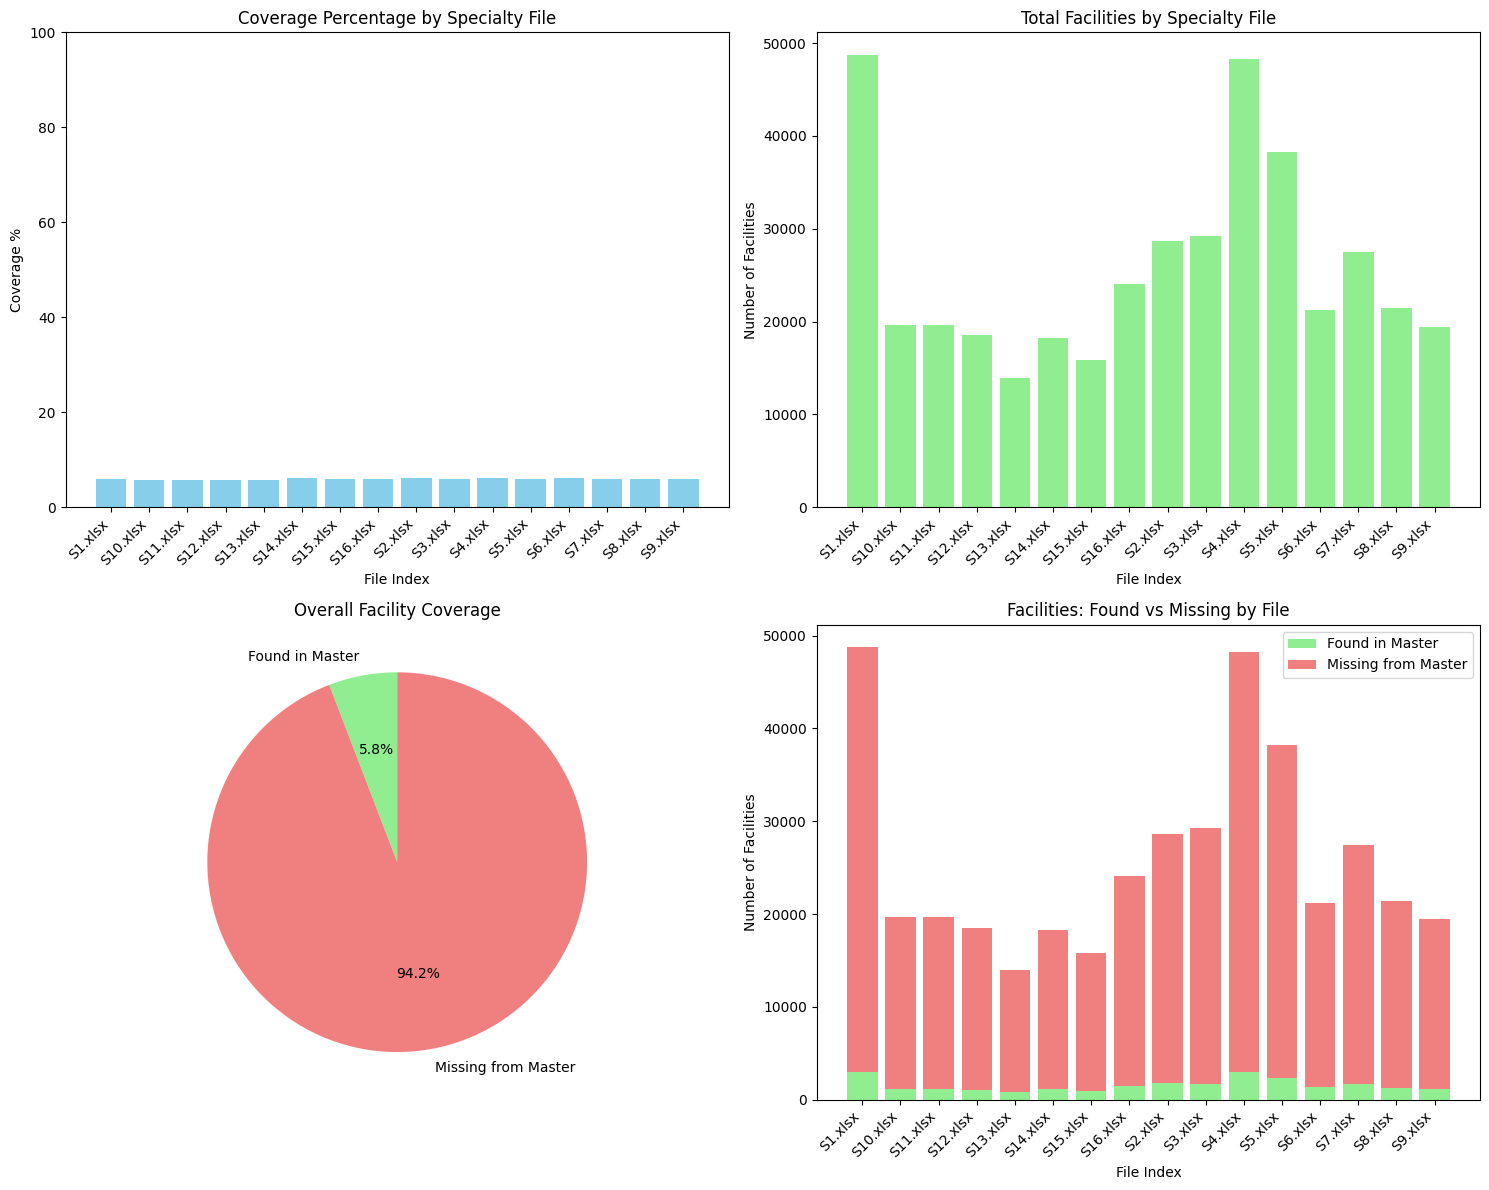


DETAILED MISSING FACILITIES REPORT

Facilities in specialty data that are NOT found in master data (64123 total):
------------------------------------------------------------
  1. " JAY GURUDEV" B/H SHANTESHWAR TEMPLE, SHANTESHWAR road, JOSHIPARA, JUNAGADH, 362002, JUNAGADH, GUJARAT
  2. # 05 Lions Eye Hospital Road (off J C Road)Bangalore 560002, BANGALORE, KARNATAKA
  3. # 1, Radial Road, Pallikaranai Chennai-100, KANCHIPURAM, TAMIL NADU
  4. # 154/9, BANNERGHATTA ROAD, VIJAYAPURA, KARNATAKA
  5. # 2, C - 1, A - 1 Block, Vijayanagar 3 rd stage, MYSORE, KARNATAKA
  6. # 26, Dr, Rajkumar road, sri siddivinayaka block, teacherslayout, mysore, MYSORE, KARNATAKA
  7. # 446, New No 38, J L B Road, Next to Big Bazar, Mysuru, MYSORE, KARNATAKA
  8. # 6, BLOCK 1, MADHUVANA LAYOUT, SRIRAMPURA, 2ND STAGE, MYSORE-570023, MYSORE, KARNATAKA
  9. #1186, 2nd cross, Ashok nagar, MANDYA, KARNATAKA
 10. #1212/1 3RD CROSS ASHOKA NAGAR, MANDYA, KARNATAKA
 11. #1344/1/63/63/3 HIMIGEPURA WARD NO 193, BEHI

In [10]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Coverage by file
if summary_df is not None and len(summary_df) > 0:
    axes[0, 0].bar(range(len(summary_df)), summary_df['coverage_percent'], color='skyblue')
    axes[0, 0].set_title('Coverage Percentage by Specialty File')
    axes[0, 0].set_xlabel('File Index')
    axes[0, 0].set_ylabel('Coverage %')
    axes[0, 0].set_ylim(0, 100)
    
    # Add file names as labels (rotated)
    axes[0, 0].set_xticks(range(len(summary_df)))
    axes[0, 0].set_xticklabels(summary_df['filename'], rotation=45, ha='right')

# 2. Total facilities per file
if summary_df is not None and len(summary_df) > 0:
    axes[0, 1].bar(range(len(summary_df)), summary_df['total_facilities'], color='lightgreen')
    axes[0, 1].set_title('Total Facilities by Specialty File')
    axes[0, 1].set_xlabel('File Index')
    axes[0, 1].set_ylabel('Number of Facilities')
    axes[0, 1].set_xticks(range(len(summary_df)))
    axes[0, 1].set_xticklabels(summary_df['filename'], rotation=45, ha='right')

# 3. Overall comparison pie chart
if len(all_specialty_facilities) > 0:
    sizes = [len(common_facilities), len(missing_from_master)]
    labels = ['Found in Master', 'Missing from Master']
    colors = ['lightgreen', 'lightcoral']
    
    axes[1, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 0].set_title('Overall Facility Coverage')

# 4. Missing vs Found stacked bar
if summary_df is not None and len(summary_df) > 0:
    x_pos = range(len(summary_df))
    axes[1, 1].bar(x_pos, summary_df['found_in_master'], label='Found in Master', color='lightgreen')
    axes[1, 1].bar(x_pos, summary_df['missing_from_master'], 
                   bottom=summary_df['found_in_master'], label='Missing from Master', color='lightcoral')
    
    axes[1, 1].set_title('Facilities: Found vs Missing by File')
    axes[1, 1].set_xlabel('File Index')
    axes[1, 1].set_ylabel('Number of Facilities')
    axes[1, 1].legend()
    axes[1, 1].set_xticks(range(len(summary_df)))
    axes[1, 1].set_xticklabels(summary_df['filename'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Create a detailed missing facilities report
print("\n" + "="*70)
print("DETAILED MISSING FACILITIES REPORT")
print("="*70)

if missing_from_master:
    print(f"\nFacilities in specialty data that are NOT found in master data ({len(missing_from_master)} total):")
    print("-" * 60)
    
    # Show first 50 missing facilities
    missing_list = sorted(list(missing_from_master))
    for i, facility in enumerate(missing_list[:50], 1):
        print(f"{i:3d}. {facility}")
    
    if len(missing_list) > 50:
        print(f"... and {len(missing_list) - 50} more facilities")
else:
    print("✓ All facilities in specialty data are found in master data!")

In [11]:
# Export results to files
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Export missing facilities to CSV
if missing_from_master:
    missing_df = pd.DataFrame({
        'facility_identifier': sorted(list(missing_from_master)),
        'status': 'missing_from_master'
    })
    
    missing_file = f"/Users/ankitraj2/asar master data/missing_facilities_{timestamp}.csv"
    missing_df.to_csv(missing_file, index=False)
    print(f"✓ Missing facilities exported to: {missing_file}")

# Export summary report
summary_file = f"/Users/ankitraj2/asar master data/facility_comparison_summary_{timestamp}.csv"
if summary_df is not None and len(summary_df) > 0:
    summary_df.to_csv(summary_file, index=False)
    print(f"✓ Summary report exported to: {summary_file}")

# Create a comprehensive text report
report_file = f"/Users/ankitraj2/asar master data/facility_analysis_report_{timestamp}.txt"
with open(report_file, 'w') as f:
    f.write("SPECIALTY DATA vs MASTER DATA FACILITY COMPARISON REPORT\\n")
    f.write("=" * 60 + "\\n")
    f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\\n\\n")
    
    f.write("SUMMARY:\\n")
    f.write(f"Total specialty files analyzed: {len(specialty_data)}\\n")
    f.write(f"Total master files analyzed: {len(master_data)}\\n")
    f.write(f"Unique facilities in specialty data: {len(all_specialty_facilities)}\\n")
    f.write(f"Unique facilities in master data: {len(all_master_facilities)}\\n")
    f.write(f"Common facilities: {len(common_facilities)}\\n")
    f.write(f"Missing from master: {len(missing_from_master)}\\n")
    f.write(f"Missing from specialty: {len(missing_from_specialty)}\\n")
    
    if len(all_specialty_facilities) > 0:
        coverage = (len(common_facilities) / len(all_specialty_facilities)) * 100
        f.write(f"Coverage percentage: {coverage:.1f}%\\n")
    
    f.write("\\nFILE-BY-FILE ANALYSIS:\\n")
    f.write("-" * 30 + "\\n")
    for analysis in file_analysis:
        f.write(f"\\n{analysis['filename']}:\\n")
        f.write(f"  Total facilities: {analysis['total_facilities']}\\n")
        f.write(f"  Found in master: {analysis['found_in_master']}\\n")
        f.write(f"  Missing from master: {analysis['missing_from_master']}\\n")
        f.write(f"  Coverage: {analysis['coverage_percent']:.1f}%\\n")
        f.write(f"  Columns used: {analysis['columns_used']}\\n")
    
    f.write("\\nMISSING FACILITIES (first 100):\\n")
    f.write("-" * 30 + "\\n")
    for i, facility in enumerate(sorted(list(missing_from_master))[:100], 1):
        f.write(f"{i:3d}. {facility}\\n")

print(f"✓ Comprehensive report exported to: {report_file}")

print("\\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print(f"Check the exported files for detailed results:")
print(f"- Missing facilities: {missing_file if missing_from_master else 'No missing facilities'}")
print(f"- Summary report: {summary_file}")
print(f"- Comprehensive report: {report_file}")

✓ Missing facilities exported to: /Users/ankitraj2/asar master data/missing_facilities_20250921_013917.csv
✓ Summary report exported to: /Users/ankitraj2/asar master data/facility_comparison_summary_20250921_013917.csv
✓ Comprehensive report exported to: /Users/ankitraj2/asar master data/facility_analysis_report_20250921_013917.txt
\n======================================================================
ANALYSIS COMPLETE!
Check the exported files for detailed results:
- Missing facilities: /Users/ankitraj2/asar master data/missing_facilities_20250921_013917.csv
- Summary report: /Users/ankitraj2/asar master data/facility_comparison_summary_20250921_013917.csv
- Comprehensive report: /Users/ankitraj2/asar master data/facility_analysis_report_20250921_013917.txt


## Specific Analysis: PMJAY vs NHA Master Deduplicated Dataset

Let's perform a targeted comparison between the PMJAY dataset and the NHA Master deduplicated dataset.

In [12]:
# Load PMJAY dataset
print("LOADING PMJAY DATASET")
print("="*50)

pmjay_file = "/Users/ankitraj2/asar master data/18_MAY_23_SRK_PMJAY_validated_and_standardized.csv"
nha_master_file = "/Users/ankitraj2/asar master data/NHA_Master_deduplicated_20250913_115643.csv"

try:
    pmjay_df = pd.read_csv(pmjay_file)
    print(f"✓ PMJAY dataset loaded successfully")
    print(f"  Shape: {pmjay_df.shape}")
    print(f"  Columns: {list(pmjay_df.columns)}")
    print(f"  First 3 rows:")
    print(pmjay_df.head(3))
except Exception as e:
    print(f"✗ Error loading PMJAY dataset: {e}")

print("\n" + "="*50)
print("LOADING NHA MASTER DEDUPLICATED DATASET")
print("="*50)

try:
    nha_master_df = pd.read_csv(nha_master_file)
    print(f"✓ NHA Master dataset loaded successfully")
    print(f"  Shape: {nha_master_df.shape}")
    print(f"  Columns: {list(nha_master_df.columns)}")
    print(f"  First 3 rows:")
    print(nha_master_df.head(3))
except Exception as e:
    print(f"✗ Error loading NHA Master dataset: {e}")

LOADING PMJAY DATASET
✓ PMJAY dataset loaded successfully
  Shape: (11284, 78)
  Columns: ['Sr No', 'Hospital Name', 'Manual Hospital Name', 'Hospital Type', 'Manual Hospital Address', 'API Latitude', 'API Longitude', 'Hospital Address', 'Hospital E-Mail', 'Hospital Contact', 'Specialities Empanelled', 'Specialities Upgraded', 'Types of Employees', 'M1_emp', 'M10_emp', 'M2_emp', 'M3_emp', 'M4_emp', 'M5_emp', 'M6_emp', 'M7_emp', 'M8_emp', 'S1_emp', 'S10_emp', 'S11_emp', 'S12_emp', 'S13_emp', 'S14_emp', 'S15_emp', 'S16_emp', 'S2_emp', 'S3_emp', 'S4_emp', 'S5_emp', 'S6_emp', 'S7_emp', 'M1_upg', 'M10_upg', 'M2_upg', 'M3_upg', 'M4_upg', 'M5_upg', 'M6_upg', 'M7_upg', 'M8_upg', 'S1_upg', 'S10_upg', 'S11_upg', 'S12_upg', 'S13_upg', 'S14_upg', 'S15_upg', 'S16_upg', 'S2_upg', 'S3_upg', 'S4_upg', 'S5_upg', 'S6_upg', 'S7_upg', 'Manual District', 'Manual state', 'gmaps_Latitude', 'gmaps_Longitude', 'gmaps_Accuracy', 'Specialities_Upgraded_or_Empanelled', 'Test extract', 'is_RU', 'pincode_py', 'addr

In [13]:
# Analyze the structure and identify matching columns
print("ANALYZING DATASETS FOR COMPARISON")
print("="*50)

# Function to identify potential facility identifier columns
def identify_facility_columns(df, dataset_name):
    """Identify columns that could be used for facility matching"""
    potential_cols = []
    
    # Look for ID/code columns
    id_patterns = ['id', 'code', 'facility_id', 'hospital_id', 'empanelment']
    for col in df.columns:
        col_lower = col.lower()
        if any(pattern in col_lower for pattern in id_patterns):
            potential_cols.append(('id', col))
    
    # Look for name columns
    name_patterns = ['name', 'hospital_name', 'facility_name']
    for col in df.columns:
        col_lower = col.lower()
        if any(pattern in col_lower for pattern in name_patterns):
            potential_cols.append(('name', col))
    
    # Look for address columns
    address_patterns = ['address', 'location', 'city', 'district', 'state']
    for col in df.columns:
        col_lower = col.lower()
        if any(pattern in col_lower for pattern in address_patterns):
            potential_cols.append(('address', col))
    
    print(f"\n{dataset_name} - Potential matching columns:")
    for col_type, col_name in potential_cols:
        unique_count = df[col_name].nunique()
        non_null_count = df[col_name].notna().sum()
        print(f"  {col_type.upper():8s}: {col_name:<30s} | Unique: {unique_count:6d} | Non-null: {non_null_count:6d}")
    
    return potential_cols

# Analyze both datasets
if 'pmjay_df' in locals():
    pmjay_cols = identify_facility_columns(pmjay_df, "PMJAY Dataset")
else:
    print("PMJAY dataset not loaded")

if 'nha_master_df' in locals():
    nha_cols = identify_facility_columns(nha_master_df, "NHA Master Dataset")
else:
    print("NHA Master dataset not loaded")

ANALYZING DATASETS FOR COMPARISON

PMJAY Dataset - Potential matching columns:
  ID      : pincode_py                     | Unique:   4381 | Non-null:  11284
  ID      : Zipcode                        | Unique:   4345 | Non-null:  10374
  NAME    : Hospital Name                  | Unique:  11031 | Non-null:  11284
  NAME    : Manual Hospital Name           | Unique:  10376 | Non-null:  11284
  ADDRESS : Manual Hospital Address        | Unique:   9645 | Non-null:  11284
  ADDRESS : Hospital Address               | Unique:  10221 | Non-null:  11284
  ADDRESS : Manual District                | Unique:    622 | Non-null:  11247
  ADDRESS : Manual state                   | Unique:     36 | Non-null:  11284
  ADDRESS : address_py                     | Unique:   8882 | Non-null:  11284
  ADDRESS : District                       | Unique:    115 | Non-null:   3176
  ADDRESS : City                           | Unique:    699 | Non-null:  11244
  ADDRESS : State                          | Unique:

In [14]:
# Perform the comparison based on the best available identifiers
print("\nFACILITY COMPARISON: PMJAY vs NHA MASTER")
print("="*60)

def compare_datasets(pmjay_df, nha_df, comparison_strategies):
    """
    Compare two datasets using multiple strategies and return results
    """
    results = {}
    
    for strategy_name, pmjay_col, nha_col in comparison_strategies:
        if pmjay_col in pmjay_df.columns and nha_col in nha_df.columns:
            # Get unique values from both datasets
            pmjay_values = set(pmjay_df[pmjay_col].dropna().astype(str).str.strip())
            nha_values = set(nha_df[nha_col].dropna().astype(str).str.strip())
            
            # Remove empty strings and common non-values
            exclude_values = {'', 'nan', 'null', 'none', 'na', 'n/a', '0'}
            pmjay_values = {v for v in pmjay_values if v.lower() not in exclude_values}
            nha_values = {v for v in nha_values if v.lower() not in exclude_values}
            
            # Find matches and misses
            common = pmjay_values & nha_values
            missing_from_nha = pmjay_values - nha_values
            
            # Calculate coverage
            coverage = (len(common) / len(pmjay_values)) * 100 if len(pmjay_values) > 0 else 0
            
            results[strategy_name] = {
                'pmjay_column': pmjay_col,
                'nha_column': nha_col,
                'pmjay_total': len(pmjay_values),
                'nha_total': len(nha_values),
                'common': len(common),
                'missing_from_nha': len(missing_from_nha),
                'coverage_percent': coverage,
                'missing_facilities': list(missing_from_nha)[:20]  # First 20 missing
            }
            
            print(f"\n{strategy_name}:")
            print(f"  PMJAY column: {pmjay_col}")
            print(f"  NHA column: {nha_col}")
            print(f"  PMJAY facilities: {len(pmjay_values):,}")
            print(f"  NHA facilities: {len(nha_values):,}")
            print(f"  Common facilities: {len(common):,}")
            print(f"  Missing from NHA: {len(missing_from_nha):,}")
            print(f"  Coverage: {coverage:.1f}%")
    
    return results

# Define comparison strategies
if 'pmjay_df' in locals() and 'nha_master_df' in locals():
    # Try different column combinations for comparison
    strategies = []
    
    # Strategy 1: Facility ID comparison (if available)
    if 'Facility ID' in pmjay_df.columns and 'Facility ID' in nha_master_df.columns:
        strategies.append(("Facility ID Match", "Facility ID", "Facility ID"))
    
    # Strategy 2: Name comparison
    pmjay_name_cols = [col for col in pmjay_df.columns if 'name' in col.lower()]
    nha_name_cols = [col for col in nha_master_df.columns if 'name' in col.lower()]
    
    if pmjay_name_cols and nha_name_cols:
        strategies.append(("Name Match", pmjay_name_cols[0], nha_name_cols[0]))
    
    # Strategy 3: Hospital code comparison (if available)
    pmjay_code_cols = [col for col in pmjay_df.columns if 'code' in col.lower() or 'id' in col.lower()]
    nha_code_cols = [col for col in nha_master_df.columns if 'id' in col.lower()]
    
    if pmjay_code_cols and nha_code_cols:
        strategies.append(("Code/ID Match", pmjay_code_cols[0], nha_code_cols[0]))
    
    print(f"Using {len(strategies)} comparison strategies...")
    
    comparison_results = compare_datasets(pmjay_df, nha_master_df, strategies)
else:
    print("Cannot perform comparison - datasets not loaded properly")


FACILITY COMPARISON: PMJAY vs NHA MASTER
Using 2 comparison strategies...

Name Match:
  PMJAY column: Hospital Name
  NHA column: Name
  PMJAY facilities: 11,031
  NHA facilities: 278,910
  Common facilities: 2,386
  Missing from NHA: 8,645
  Coverage: 21.6%

Code/ID Match:
  PMJAY column: pincode_py
  NHA column: Facility ID
  PMJAY facilities: 4,380
  NHA facilities: 278,910
  Common facilities: 1,254
  Missing from NHA: 3,126
  Coverage: 28.6%



DETAILED ANALYSIS RESULTS

SUMMARY TABLE:
     Strategy  PMJAY_Facilities  NHA_Facilities  Common  Missing_from_NHA  Coverage_%
   Name Match             11031          278910    2386              8645        21.6
Code/ID Match              4380          278910    1254              3126        28.6

BEST MATCHING STRATEGY: Code/ID Match (28.6% coverage)
------------------------------------------------------------
PMJAY Column: pincode_py
NHA Column: Facility ID
Total PMJAY facilities: 4,380
Total NHA facilities: 278,910
Common facilities: 1,254
Missing from NHA: 3,126
Coverage percentage: 28.6%

Sample missing facilities (first 20):
   1. 364522
   2. 600004
   3. 784153
   4. 422209
   5. 612001
   6. 431517
   7. 638012
   8. 144527
   9. 466331
  10. 222203
  11. 480449
  12. 781004
  13. 571234
  14. 639001
  15. 795106
  16. 833221
  17. 132027
  18. 758037
  19. 673571
  20. 134007


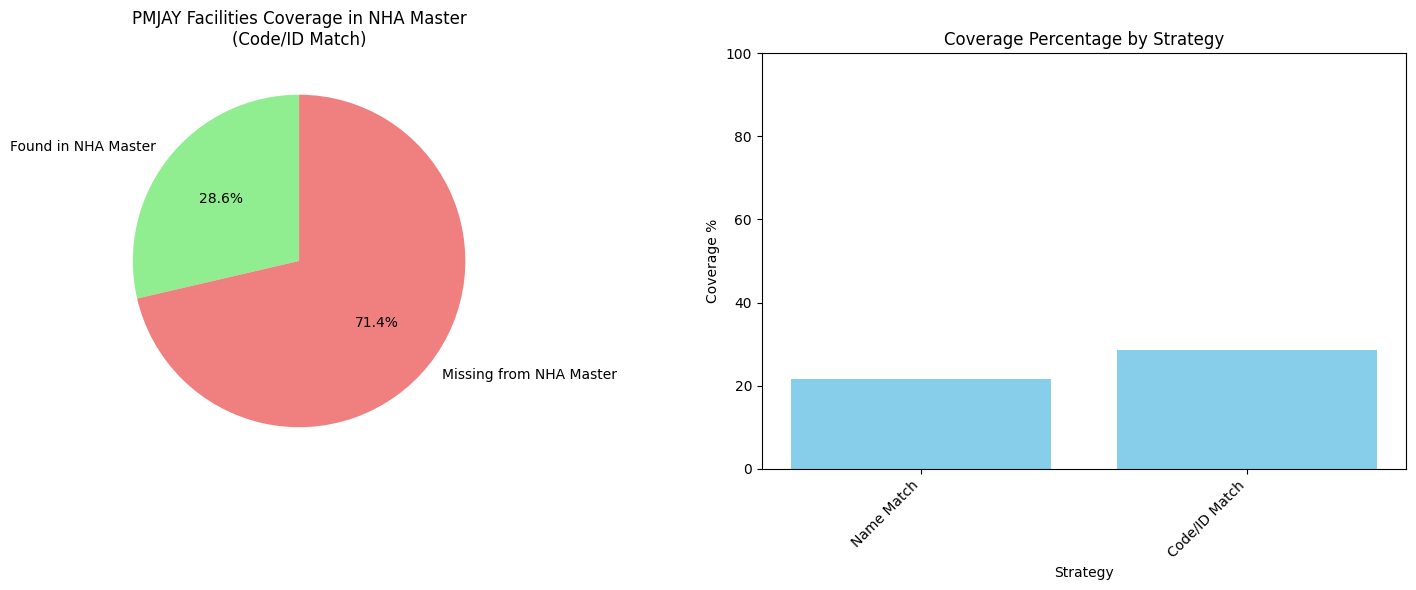


✓ Missing PMJAY facilities exported to: /Users/ankitraj2/asar master data/pmjay_missing_from_nha_20250921_015514.csv
✓ Comparison summary exported to: /Users/ankitraj2/asar master data/pmjay_nha_comparison_summary_20250921_015514.csv


In [15]:
# Create detailed report and visualizations for PMJAY vs NHA comparison
print("\nDETAILED ANALYSIS RESULTS")
print("="*60)

if 'comparison_results' in locals() and comparison_results:
    # Create summary table
    summary_data = []
    best_strategy = None
    best_coverage = 0
    
    for strategy, result in comparison_results.items():
        summary_data.append({
            'Strategy': strategy,
            'PMJAY_Facilities': result['pmjay_total'],
            'NHA_Facilities': result['nha_total'], 
            'Common': result['common'],
            'Missing_from_NHA': result['missing_from_nha'],
            'Coverage_%': round(result['coverage_percent'], 1)
        })
        
        if result['coverage_percent'] > best_coverage:
            best_coverage = result['coverage_percent']
            best_strategy = strategy
    
    summary_df = pd.DataFrame(summary_data)
    print("\nSUMMARY TABLE:")
    print(summary_df.to_string(index=False))
    
    # Show detailed results for the best strategy
    if best_strategy:
        print(f"\nBEST MATCHING STRATEGY: {best_strategy} ({best_coverage:.1f}% coverage)")
        print("-" * 60)
        
        best_result = comparison_results[best_strategy]
        print(f"PMJAY Column: {best_result['pmjay_column']}")
        print(f"NHA Column: {best_result['nha_column']}")
        print(f"Total PMJAY facilities: {best_result['pmjay_total']:,}")
        print(f"Total NHA facilities: {best_result['nha_total']:,}")
        print(f"Common facilities: {best_result['common']:,}")
        print(f"Missing from NHA: {best_result['missing_from_nha']:,}")
        print(f"Coverage percentage: {best_result['coverage_percent']:.1f}%")
        
        # Show sample missing facilities
        if best_result['missing_facilities']:
            print(f"\nSample missing facilities (first 20):")
            for i, facility in enumerate(best_result['missing_facilities'][:20], 1):
                print(f"  {i:2d}. {facility}")
        
        # Create visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Pie chart for coverage
        sizes = [best_result['common'], best_result['missing_from_nha']]
        labels = ['Found in NHA Master', 'Missing from NHA Master']
        colors = ['lightgreen', 'lightcoral']
        
        axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[0].set_title(f'PMJAY Facilities Coverage in NHA Master\n({best_strategy})')
        
        # Bar chart comparison
        strategies_names = [result['Strategy'] for result in summary_data]
        coverage_values = [result['Coverage_%'] for result in summary_data]
        
        axes[1].bar(range(len(strategies_names)), coverage_values, color='skyblue')
        axes[1].set_title('Coverage Percentage by Strategy')
        axes[1].set_ylabel('Coverage %')
        axes[1].set_xlabel('Strategy')
        axes[1].set_xticks(range(len(strategies_names)))
        axes[1].set_xticklabels(strategies_names, rotation=45, ha='right')
        axes[1].set_ylim(0, 100)
        
        plt.tight_layout()
        plt.show()
        
        # Export results
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        # Export missing facilities from PMJAY
        if best_result['missing_facilities']:
            missing_pmjay_df = pd.DataFrame({
                'facility_identifier': best_result['missing_facilities'],
                'source_dataset': 'PMJAY',
                'comparison_strategy': best_strategy,
                'status': 'missing_from_nha_master'
            })
            
            missing_file = f"/Users/ankitraj2/asar master data/pmjay_missing_from_nha_{timestamp}.csv"
            missing_pmjay_df.to_csv(missing_file, index=False)
            print(f"\n✓ Missing PMJAY facilities exported to: {missing_file}")
        
        # Export summary
        summary_file = f"/Users/ankitraj2/asar master data/pmjay_nha_comparison_summary_{timestamp}.csv"
        summary_df.to_csv(summary_file, index=False)
        print(f"✓ Comparison summary exported to: {summary_file}")
        
    else:
        print("No valid comparison strategy found")
else:
    print("No comparison results available")